# Simple Plotly dashboards

The data for this notebook comes from BigQuery public data set. 

```sql
SELECT
  year,
  SUM(number) as Graces
FROM
  `bigquery-public-data.usa_names.usa_1910_current`
WHERE
  name='Grace'
GROUP BY
  year
ORDER BY year;
```

A similar SQL query got the sum of people named John grouped per year.

In [1]:
import pandas as pd

In [2]:
graces = pd.read_csv('graces_per_year.csv')

In [3]:
johns = pd.read_csv('johns_per_year.csv')

In [4]:
graces

,year,Graces
0,1910,3134
1,1911,3300
2,1912,4409
3,1913,4660
4,1914,5584
...,...,...
106,2016,7604
107,2017,7057
108,2018,6766
109,2019,6075


In [5]:
johns

,year,John
0,1910,11479
1,1911,13469
2,1912,24662
3,1913,29401
4,1914,38051
...,...,...
106,2016,10034
107,2017,9503
108,2018,9170
109,2019,8813


In [6]:
johns.columns = johns.columns.str.replace('John', 'Johns')

In [7]:
johns

,year,Johns
0,1910,11479
1,1911,13469
2,1912,24662
3,1913,29401
4,1914,38051
...,...,...
106,2016,10034
107,2017,9503
108,2018,9170
109,2019,8813


In [8]:
johns_and_graces = graces.join(johns.set_index('year'), on='year')

In [9]:
johns_and_graces

,year,Graces,Johns
0,1910,3134,11479
1,1911,3300,13469
2,1912,4409,24662
3,1913,4660,29401
4,1914,5584,38051
...,...,...,...
106,2016,7604,10034
107,2017,7057,9503
108,2018,6766,9170
109,2019,6075,8813


In [10]:
johns_and_graces.set_index(keys = ["year"], inplace = True)

In [11]:
johns_and_graces

,Graces,Johns
year,,
1910,3134,11479
1911,3300,13469
1912,4409,24662
1913,4660,29401
1914,5584,38051
...,...,...
2016,7604,10034
2017,7057,9503
2018,6766,9170


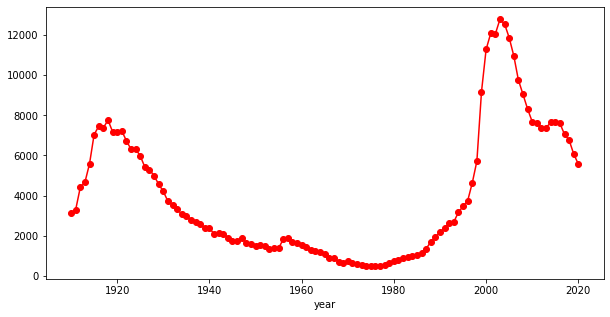

In [12]:
johns_and_graces['Graces'].plot(figsize = (10,5), marker = 'o', color = 'r');

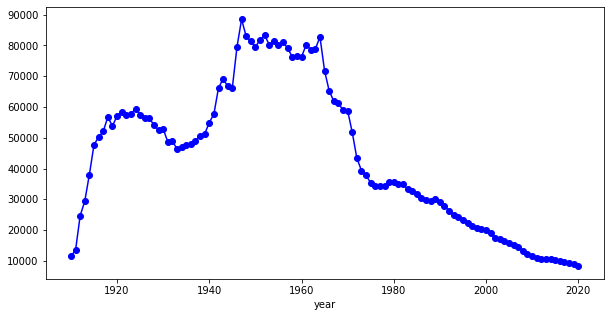

In [14]:
johns_and_graces['Johns'].plot(figsize = (10,5), marker = 'o', color = 'b');

In [21]:
from plotly.subplots import make_subplots # imports # imports plotly
import plotly.graph_objects as go # imports plotly graph objects as go

fig = make_subplots(rows=3, cols=1) # makes sublots that stack underneath each other

fig.append_trace(go.Scatter( # makes first plot - it is a line graph
    x=johns_and_graces.index,
    y=johns_and_graces['Graces'],
    name="Graces"
), row=1, col=1)

fig.append_trace(go.Scatter( # makes second plot - it is a line graph
    x=johns_and_graces.index,
    y=johns_and_graces['Johns'],
    name="Johns"
), row=2, col=1)

fig.append_trace(go.Bar(
    x=['Graces', 'Johns'],
    y=[johns_and_graces['Graces'].sum(),johns_and_graces['Johns'].sum()],
    marker=dict(color=['royalblue','gold']),
    showlegend=False,
    name = 'Totals'
), row=3, col=1)

fig.update_layout(height=600, width=600, title_text="Graces and Johns in the USA")
fig.show()

In [22]:
fig.write_html("index.html")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5979d33c-fd8c-42c7-8cb3-991cf5bd132d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>